In [1]:
import anndata
import numpy as np
import sys
import torch
sys.path.append('../../../../')
import velovae as vv
%load_ext autoreload
%autoreload 2

In [2]:
import scvelo as scv
dataset = 'Dentategyrus'
# Uncomment this if you don't have preprocessed file
#adata = scv.datasets.dentategyrus(file_path='data/download/Dentategyrus.h5ad')
root = '/scratch/blaauw_root/blaauw1/gyichen'
adata = anndata.read_h5ad(f'{root}/data/Dentategyrus_pp.h5ad')

In [ ]:
#vv.preprocess(adata, n_gene=2000, min_shared_counts=20)
#adata.write_h5ad(f'data/{dataset}.h5ad')

In [3]:
model_path_base = f'{root}/checkpoints/{dataset}'
figure_path_base = f'{root}/figures/{dataset}'
data_path = f'{root}/data/velovae/continuous/{dataset}'
gene_plot = ['Tmsb10', 'Atp1a2', 'Hpgds', 'Cplx2']

# VeloVAE

In [4]:
figure_path = f'{figure_path_base}/VeloVAE'
model_path = f'{model_path_base}/VeloVAE'

torch.manual_seed(2022)
np.random.seed(2022)
vae = vv.VAE(adata, 
             tmax=20, 
             dim_z=15, 
             device='cuda:0',
             init_method='steady')
config = {
    'n_neighbors': 3
}
vae.train(adata, config=config, plot=False, gene_plot=gene_plot, figure_path=figure_path)

vae.save_model(model_path, 'encoder', 'decoder')
vae.save_anndata(adata, 'velovae', data_path, file_name=f'{dataset}.h5ad')

Estimating ODE parameters...


  0%|          | 0/1000 [00:00<?, ?it/s]

Detected 255 velocity genes.
Estimating the variance...


  0%|          | 0/1000 [00:00<?, ?it/s]

Initialization using the steady-state and dynamical models.
Reinitialize the regular ODE parameters based on estimated global latent time.


  0%|          | 0/1000 [00:00<?, ?it/s]

3 clusters detected based on gene co-expression.
(0.53, 0.7940861417910453), (0.47, 0.2627669307941492)
(0.49, 0.7775889478200321), (0.51, 0.2601876073663219)
(0.30, 0.3421788138328361), (0.70, 0.8284624210566714)
KS-test result: [0. 0. 0.]
Initial induction: 602, repression: 398/1000
Learning Rate based on Data Sparsity: 0.0003
--------------------------- Train a VeloVAE ---------------------------
*********        Creating Training/Validation Datasets        *********
*********                      Finished.                      *********
*********                 Creating optimizers                 *********
*********                      Finished.                      *********
*********                    Start training                   *********
*********                      Stage  1                       *********
Total Number of Iterations Per Epoch: 17, test iteration: 32
*********       Stage 1: Early Stop Triggered at epoch 605.       *********
*********                   

  0%|          | 0/2930 [00:00<?, ?it/s]

Percentage of Invalid Sets: 0.037
Average Set Size: 58
*********     Round 1: Early Stop Triggered at epoch 856.    *********
Change in noise variance: 0.3654
*********             Velocity Refinement Round 2             *********
*********     Round 2: Early Stop Triggered at epoch 1077.    *********
Change in noise variance: 0.0032
Change in x0: 0.2838
*********             Velocity Refinement Round 3             *********
*********     Round 3: Early Stop Triggered at epoch 1145.    *********
Change in noise variance: 0.0006
Change in x0: 0.1456
*********             Velocity Refinement Round 4             *********
*********     Round 4: Early Stop Triggered at epoch 1274.    *********
Change in noise variance: 0.0000
Change in x0: 0.1098
*********             Velocity Refinement Round 5             *********
*********     Round 5: Early Stop Triggered at epoch 1491.    *********
Change in noise variance: 0.0000
Change in x0: 0.1008
*********             Velocity Refinement Round 6

# Full VB

In [5]:
figure_path = f'{figure_path_base}/FullVB'
model_path = f'{model_path_base}/FullVB'

torch.manual_seed(2022)
np.random.seed(2022)
full_vb = vv.VAE(adata, 
                 tmax=20, 
                 dim_z=15, 
                 device='cuda:0',
                 full_vb=True,
                 init_method='steady')
config = {
    'n_neighbors': 3
}
full_vb.train(adata, config=config, plot=False, gene_plot=gene_plot, figure_path=figure_path)

full_vb.save_model(model_path, 'encoder', 'decoder')
full_vb.save_anndata(adata, 'fullvb', data_path, file_name=f'{dataset}.h5ad')

Estimating ODE parameters...


  0%|          | 0/1000 [00:00<?, ?it/s]

Detected 255 velocity genes.
Estimating the variance...


  0%|          | 0/1000 [00:00<?, ?it/s]

Initialization using the steady-state and dynamical models.
Reinitialize the regular ODE parameters based on estimated global latent time.


  0%|          | 0/1000 [00:00<?, ?it/s]

3 clusters detected based on gene co-expression.
(0.53, 0.7940861417910453), (0.47, 0.2627669307941492)
(0.49, 0.7775889478200321), (0.51, 0.2601876073663219)
(0.30, 0.3421788138328361), (0.70, 0.8284624210566714)
KS-test result: [0. 0. 0.]
Initial induction: 602, repression: 398/1000
Learning Rate based on Data Sparsity: 0.0003
--------------------------- Train a VeloVAE ---------------------------
*********        Creating Training/Validation Datasets        *********
*********                      Finished.                      *********
*********                 Creating optimizers                 *********
*********                      Finished.                      *********
*********                    Start training                   *********
*********                      Stage  1                       *********
Total Number of Iterations Per Epoch: 17, test iteration: 32
*********       Stage 1: Early Stop Triggered at epoch 989.       *********
*********                   

  0%|          | 0/2930 [00:00<?, ?it/s]

Percentage of Invalid Sets: 0.031
Average Set Size: 58
*********     Round 1: Early Stop Triggered at epoch 1193.    *********
Change in noise variance: 0.3446
*********             Velocity Refinement Round 2             *********
*********     Round 2: Early Stop Triggered at epoch 1305.    *********
Change in noise variance: 0.0034
Change in x0: 0.2408
*********             Velocity Refinement Round 3             *********
*********     Round 3: Early Stop Triggered at epoch 1477.    *********
Change in noise variance: 0.0011
Change in x0: 0.1994
*********             Velocity Refinement Round 4             *********
*********     Round 4: Early Stop Triggered at epoch 1508.    *********
Change in noise variance: 0.0004
Change in x0: 0.2204
*********             Velocity Refinement Round 5             *********
Stage 2: Early Stop Triggered at round 4.
*********              Finished. Total Time =   0 h :  6 m : 27 s             *********
Final: Train ELBO = 2480.653,	Test ELBO = 24

# Plotting

In [3]:
root = '/scratch/blaauw_root/blaauw1/gyichen'
dataset = 'Dentategyrus'
adata = anndata.read_h5ad(f'{root}/data/velovae/continuous/{dataset}/{dataset}.h5ad')

In [4]:
Ek = np.median(adata.layers['fullvb_velocity_u']**2 + adata.layers['fullvb_velocity']**2, 0)
gidx = np.argsort(Ek)[-4:]

---   Plotting  Results   ---


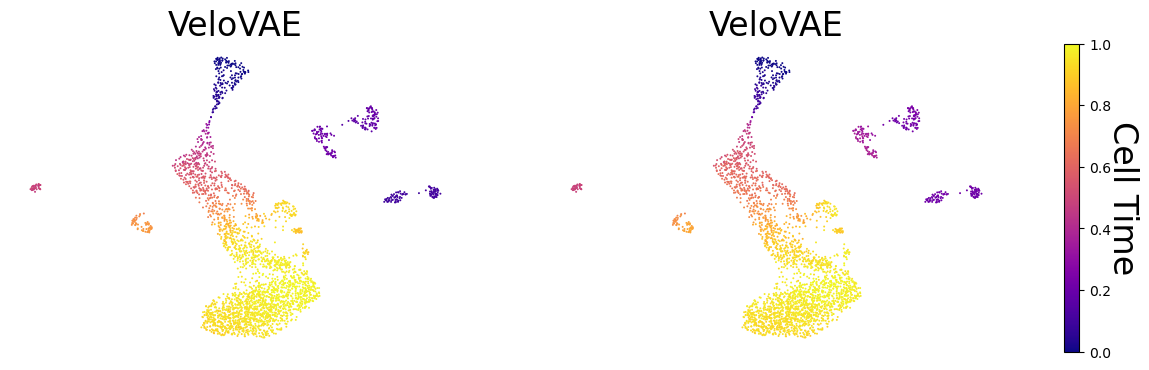

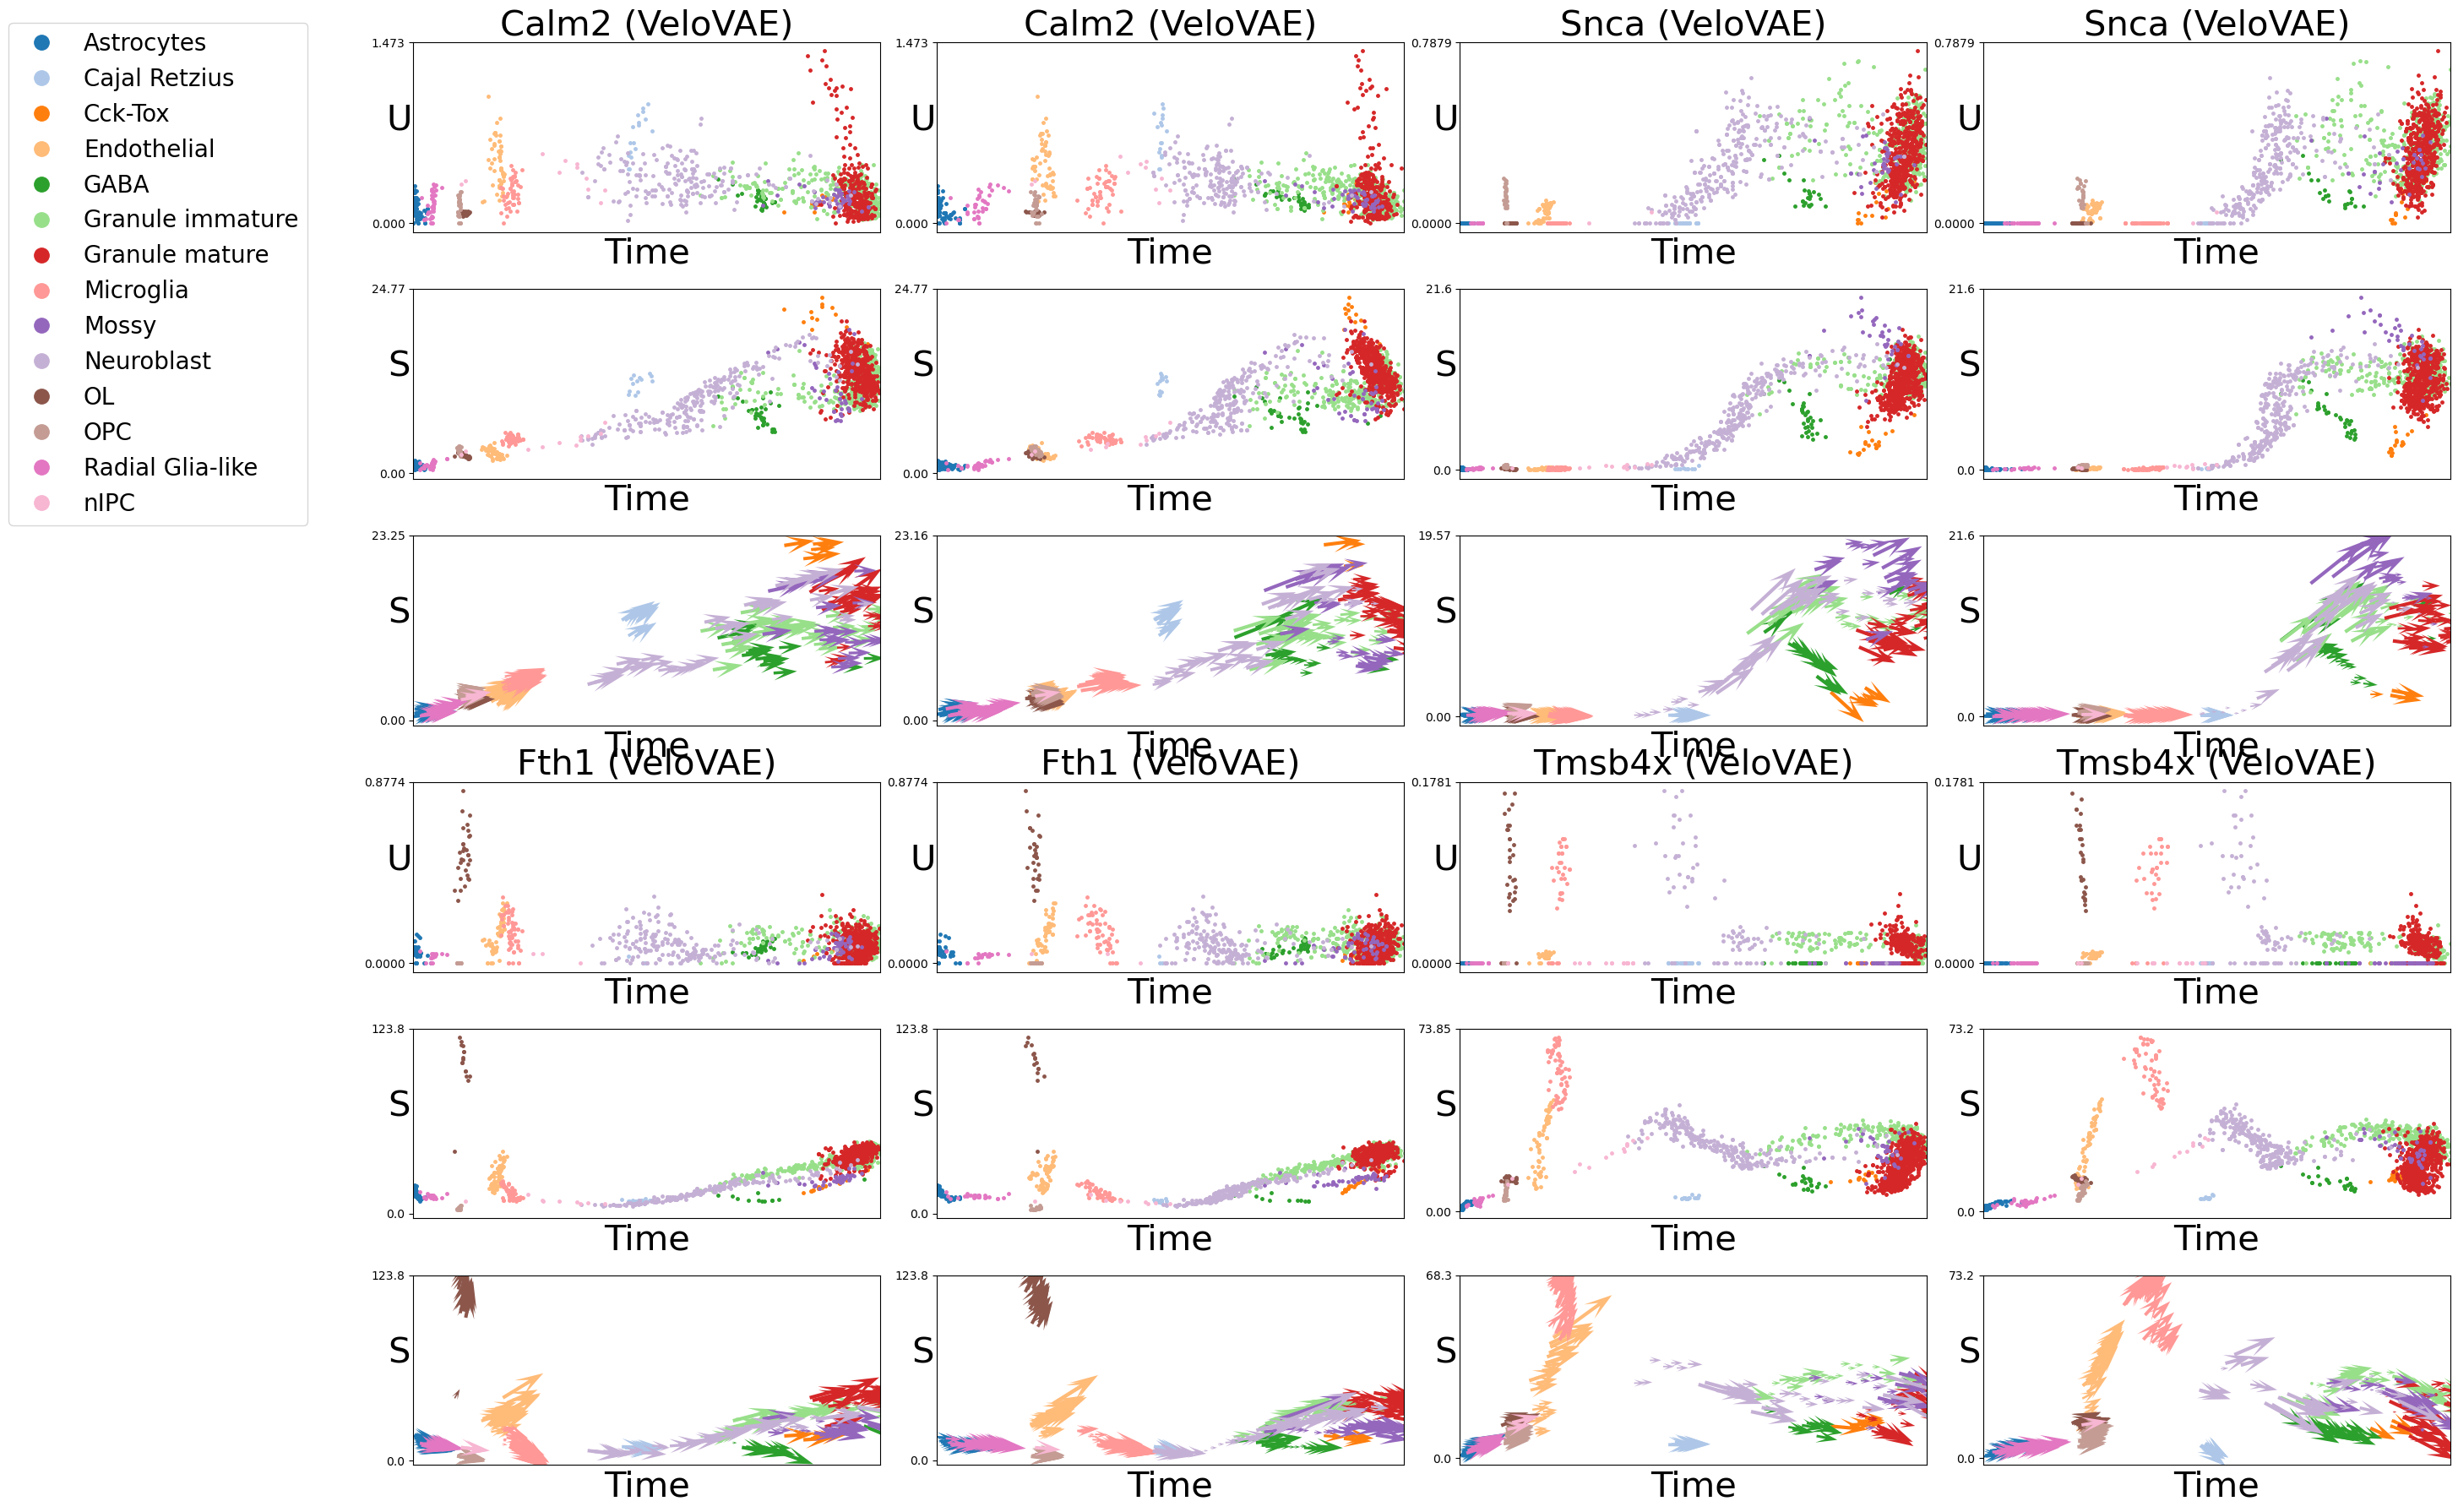

In [5]:
gidx = np.argsort(Ek)[-4:]
gene_plot = adata.var_names[gidx]
res, res_type = vv.post_analysis(adata,
                                 dataset,
                                 ['VeloVAE', 'FullVB'],
                                 ['velovae', 'fullvb'],
                                 compute_metrics=False,
                                 genes=gene_plot,
                                 plot_type=['time', 'gene'],
                                 grid_size=(2,2))

computing velocity graph (using 1/36 cores)


  0%|          | 0/2930 [00:00<?, ?cells/s]

    finished (0:00:08) --> added 
    'fullvb_velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'fullvb_velocity_umap', embedded velocity vectors (adata.obsm)


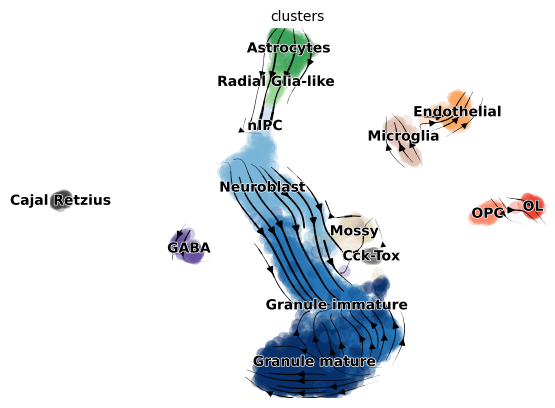

In [6]:
import scvelo as scv
scv.tl.velocity_graph(adata, vkey='fullvb_velocity')
scv.pl.velocity_embedding_stream(adata, vkey='fullvb_velocity')